## Crude Oil Price Forecasting

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
data = pd.read_csv("spot-prices-for-crude-oil.csv")
data.head()

,Date;Brent Spot Price (U.S. Dollars per Barrel);WTI Spot Price (U.S. Dollars per Barrel)
0,2021-11-26;72.37;
1,2020-01-20;64.63;
2,2017-07-04;49.15;
3,2017-01-16;54.3;
4,2021-11-17;80.67;78.32


In [3]:
data = pd.read_csv("spot-prices-for-crude-oil.csv", sep=";", index_col="Date")

In [4]:
data.head()

,Brent Spot Price (U.S. Dollars per Barrel),WTI Spot Price (U.S. Dollars per Barrel)
Date,,
2021-11-26,72.37,NaN
2020-01-20,64.63,NaN
2017-07-04,49.15,NaN
2017-01-16,54.30,NaN
2021-11-17,80.67,78.32


In [5]:
data.rename(columns={'Brent Spot Price (U.S. Dollars per Barrel)': 'Brent Spot Price',
             'WTI Spot Price (U.S. Dollars per Barrel)': 'WTI Spot Price'},inplace=True)

In [6]:
data.head()

,Brent Spot Price,WTI Spot Price
Date,,
2021-11-26,72.37,NaN
2020-01-20,64.63,NaN
2017-07-04,49.15,NaN
2017-01-16,54.30,NaN
2021-11-17,80.67,78.32


In [7]:
# we are intersted in predicting price of Brent Spot Price so we will 
# keep only that column

In [8]:
df = data.drop("WTI Spot Price", axis = 1)

In [9]:
df.head()


,Brent Spot Price
Date,
2021-11-26,72.37
2020-01-20,64.63
2017-07-04,49.15
2017-01-16,54.30
2021-11-17,80.67


In [10]:
# Lets do EDA on df

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1718 entries, 2021-11-26 to 2015-09-07
Data columns (total 1 columns):
Brent Spot Price    1711 non-null float64
dtypes: float64(1)
memory usage: 26.8+ KB


In [12]:
df.describe()

,Brent Spot Price
count,1711.000000
mean,56.774296
std,13.772841
min,9.120000
25%,46.940000
50%,57.550000
75%,66.800000
max,86.070000


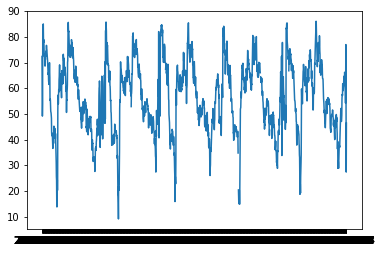

In [13]:
%matplotlib inline
plt.plot(df)

In [14]:
df.index = pd.to_datetime(df.index)
df.head()

,Brent Spot Price
Date,
2021-11-26,72.37
2020-01-20,64.63
2017-07-04,49.15
2017-01-16,54.30
2021-11-17,80.67


In [15]:
df1 = df.sort_values(by='Date')
df1.head()

,Brent Spot Price
Date,
2015-04-01,55.73
2015-04-02,55.73
2015-04-06,55.73
2015-04-07,57.55
2015-04-08,56.42


In [16]:
## Remove null values

df1.isna().sum()

Brent Spot Price    7
dtype: int64

In [17]:
df1.dropna(axis = 0, inplace=True)

In [18]:
df1.isna().sum()

Brent Spot Price    0
dtype: int64

/home/speed/.local/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


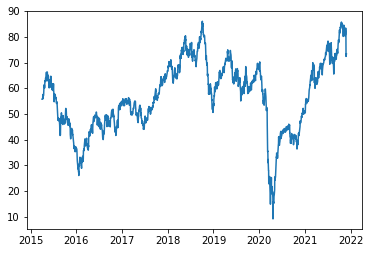

In [19]:
# plot after dropping null values
plt.plot(df1)

In [20]:
ts = df1['Brent Spot Price']

In [21]:
ts['2015-04-01']

55.73

In [22]:
ts['2015-04-01':'2015-04-30']

Date
2015-04-01    55.73
2015-04-02    55.73
2015-04-06    55.73
2015-04-07    57.55
2015-04-08    56.42
2015-04-09    56.04
2015-04-10    56.82
2015-04-13    57.14
2015-04-14    57.69
2015-04-15    59.32
2015-04-16    60.13
2015-04-17    61.31
2015-04-20    61.20
2015-04-21    60.12
2015-04-22    60.12
2015-04-23    62.66
2015-04-24    62.96
2015-04-27    62.86
2015-04-28    62.61
2015-04-29    63.97
2015-04-30    63.90
Name: Brent Spot Price, dtype: float64

In [23]:
print(ts['2015-04'])
print(len(ts['2015-04']))

Date
2015-04-01    55.73
2015-04-02    55.73
2015-04-06    55.73
2015-04-07    57.55
2015-04-08    56.42
2015-04-09    56.04
2015-04-10    56.82
2015-04-13    57.14
2015-04-14    57.69
2015-04-15    59.32
2015-04-16    60.13
2015-04-17    61.31
2015-04-20    61.20
2015-04-21    60.12
2015-04-22    60.12
2015-04-23    62.66
2015-04-24    62.96
2015-04-27    62.86
2015-04-28    62.61
2015-04-29    63.97
2015-04-30    63.90
Name: Brent Spot Price, dtype: float64
21


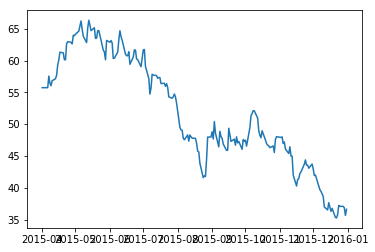

In [24]:
plt.plot(ts['2015'])

### Check Stationarity of a Time Series

In [25]:
import statsmodels
from statsmodels.tsa.stattools import adfuller


In [26]:
df_test = None
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    
    rolmean = timeseries.rolling(window=12).mean()


    rolstd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag= 'AIC')
   
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

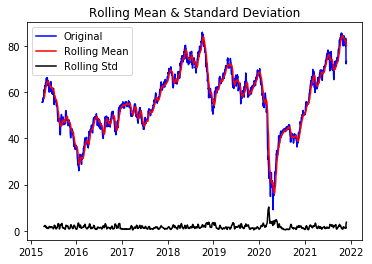

Results of Dickey-Fuller Test:
Test Statistic                   -2.039571
p-value                           0.269496
#Lags Used                        7.000000
Number of Observations Used    1703.000000
Critical Value (1%)              -3.434196
Critical Value (5%)              -2.863239
Critical Value (10%)             -2.567674
dtype: float64


In [27]:
test_stationarity(ts)

In [28]:
# Time series is not stationary as P value is 0.269496 > 0.05
# Lets eliminate the trends 

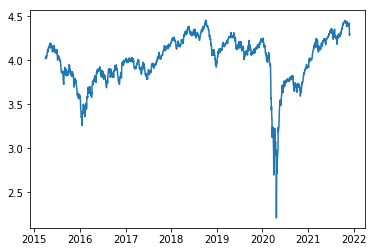

In [29]:
# reduce trend can be transformation.

ts_log = np.log(ts)
plt.plot(ts_log)

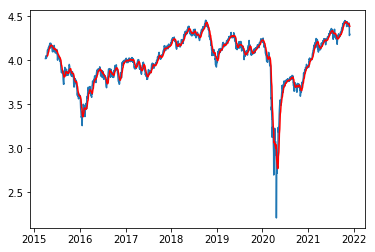

In [30]:
# get moving average of last few years for window of 12

moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, "r")

In [31]:
# lets get the difference of ts_log and Moving_avg

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2015-04-01         NaN
2015-04-02         NaN
2015-04-06         NaN
2015-04-07         NaN
2015-04-08         NaN
2015-04-09         NaN
2015-04-10         NaN
2015-04-13         NaN
2015-04-14         NaN
2015-04-15         NaN
2015-04-16         NaN
2015-04-17    0.065195
Name: Brent Spot Price, dtype: float64

In [32]:
##we are taking average of last 12 values, 
##rolling mean is not defined for first 11 values

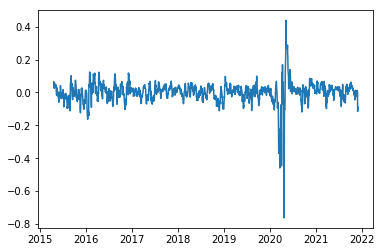

In [33]:
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

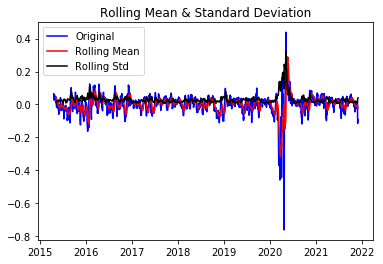

Results of Dickey-Fuller Test:
Test Statistic                -6.766498e+00
p-value                        2.708767e-09
#Lags Used                     2.500000e+01
Number of Observations Used    1.674000e+03
Critical Value (1%)           -3.434262e+00
Critical Value (5%)           -2.863268e+00
Critical Value (10%)          -2.567690e+00
dtype: float64


In [34]:
# lets check the stationarity

test_stationarity(ts_log_moving_avg_diff)

In [35]:
2.708767e-09 < 0.05

True

In [36]:

# Get exponential Weighted avg

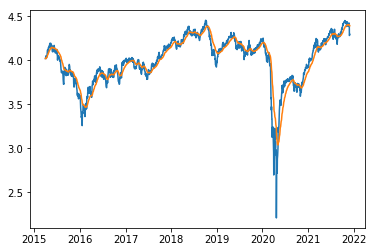

In [37]:
exp_weighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(exp_weighted_avg)

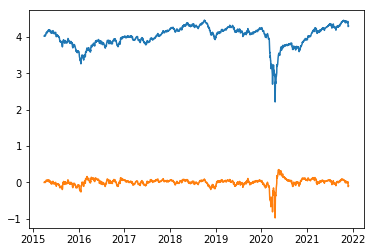

In [38]:
# get the difference of ts_log and exp_weight_avg

ts_log_exp_weighted_diff = ts_log - exp_weighted_avg
plt.plot(ts_log)
plt.plot(ts_log_exp_weighted_diff)

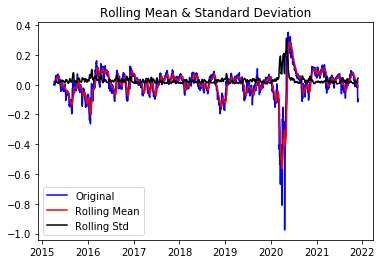

Results of Dickey-Fuller Test:
Test Statistic                -6.476100e+00
p-value                        1.330003e-08
#Lags Used                     2.500000e+01
Number of Observations Used    1.685000e+03
Critical Value (1%)           -3.434237e+00
Critical Value (5%)           -2.863257e+00
Critical Value (10%)          -2.567684e+00
dtype: float64


In [39]:
# check the stationarity for it

test_stationarity(ts_log_exp_weighted_diff)

In [40]:
1.330003e-08 < 0.05

True

In [41]:
# Eliminating Trend and Seasonality

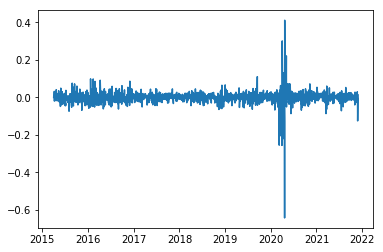

In [42]:
# Differencing techniques

ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [43]:
ts_log_diff.head()

Date
2015-04-01         NaN
2015-04-02    0.000000
2015-04-06    0.000000
2015-04-07    0.032136
2015-04-08   -0.019830
Name: Brent Spot Price, dtype: float64

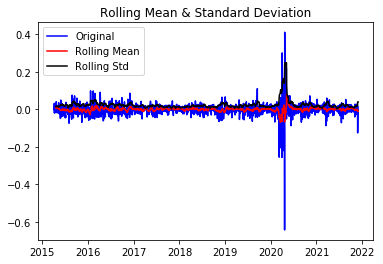

Results of Dickey-Fuller Test:
Test Statistic                -6.482685e+00
p-value                        1.283358e-08
#Lags Used                     2.500000e+01
Number of Observations Used    1.684000e+03
Critical Value (1%)           -3.434239e+00
Critical Value (5%)           -2.863258e+00
Critical Value (10%)          -2.567685e+00
dtype: float64


In [44]:
# Drop null values and test stationarity

ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)


In [45]:
1.283358e-08 < 0.05

True

In [46]:
df1.head()

,Brent Spot Price
Date,
2015-04-01,55.73
2015-04-02,55.73
2015-04-06,55.73
2015-04-07,57.55
2015-04-08,56.42


In [47]:
df1['price_difference'] = df1['Brent Spot Price'] - df1['Brent Spot Price'].shift(1)

In [48]:
df1.head()

,Brent Spot Price,price_difference
Date,,
2015-04-01,55.73,NaN
2015-04-02,55.73,0.00
2015-04-06,55.73,0.00
2015-04-07,57.55,1.82
2015-04-08,56.42,-1.13


In [49]:
df1.dropna(inplace=True)
df1.head()

,Brent Spot Price,price_difference
Date,,
2015-04-02,55.73,0.00
2015-04-06,55.73,0.00
2015-04-07,57.55,1.82
2015-04-08,56.42,-1.13
2015-04-09,56.04,-0.38


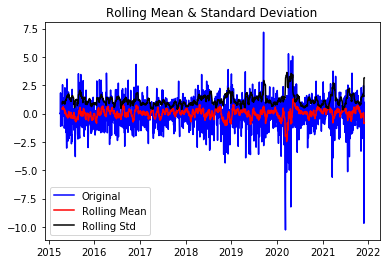

Results of Dickey-Fuller Test:
Test Statistic                -1.388520e+01
p-value                        6.108124e-26
#Lags Used                     6.000000e+00
Number of Observations Used    1.703000e+03
Critical Value (1%)           -3.434196e+00
Critical Value (5%)           -2.863239e+00
Critical Value (10%)          -2.567674e+00
dtype: float64


In [50]:
# check stationariabsty
test_stationarity(df1['price_difference'])



In [51]:
# p value is 6.108124e-26 <0.05
6.108124e-26 <0.05

True

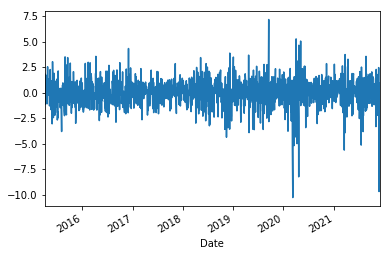

In [52]:
df1['price_difference'].plot()

### Auto Regressive Model

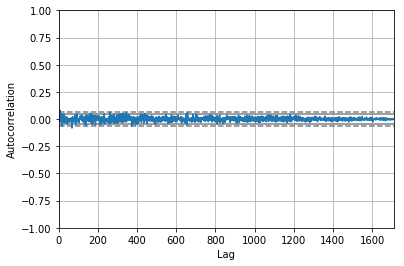

In [53]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['price_difference'])
plt.show()



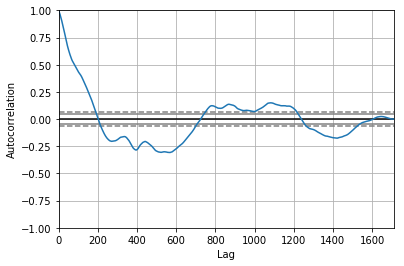

In [64]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['Brent Spot Price'])
plt.show()

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

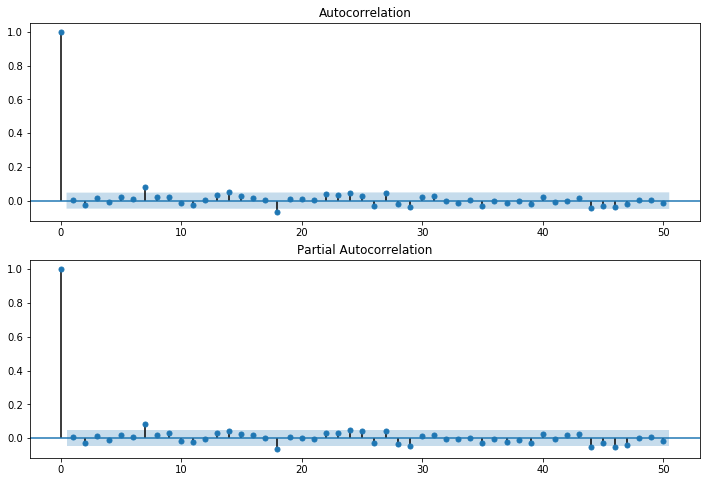

In [55]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df1['price_difference'],lags= 50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df1['price_difference'], lags= 50, ax=ax2)

### ARIMA Model

In [56]:
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [57]:
arima_model = ARIMA(df1['Brent Spot Price'], order=(1,1,0))
arima_model_fit = arima_model.fit()

/home/speed/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/speed/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [58]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Brent Spot Price   No. Observations:                 1709
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2886.452
Method:                       css-mle   S.D. of innovations              1.310
Date:                Sun, 05 Dec 2021   AIC                           5778.904
Time:                        10:12:59   BIC                           5795.235
Sample:                             1   HQIC                          5784.948
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0103      0.032      0.323      0.747      -0.052       0.073
ar.L1.D.Brent Spot Price     0.0064      0.024      0.264      0.792      -0.041       0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          156.5160           +0.0000j          156.5160            0.0000
-----------------------------------------------------------------------------
"""

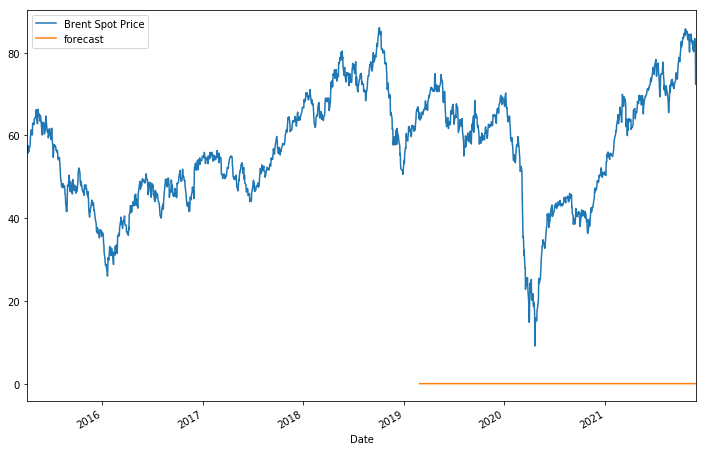

In [59]:
df1['forecast'] = arima_model_fit.predict(start = 1000, end = 1708, dynamic= True)

df1[['Brent Spot Price','forecast']].plot(figsize=(12,8))




In [60]:


import statsmodels.api as sm



In [61]:
model = sm.tsa.statespace.SARIMAX(df1['Brent Spot Price'],order=(1, 1, 1),seasonal_order=(1, 1, 1,10))
model_fit = model.fit()

/home/speed/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/speed/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


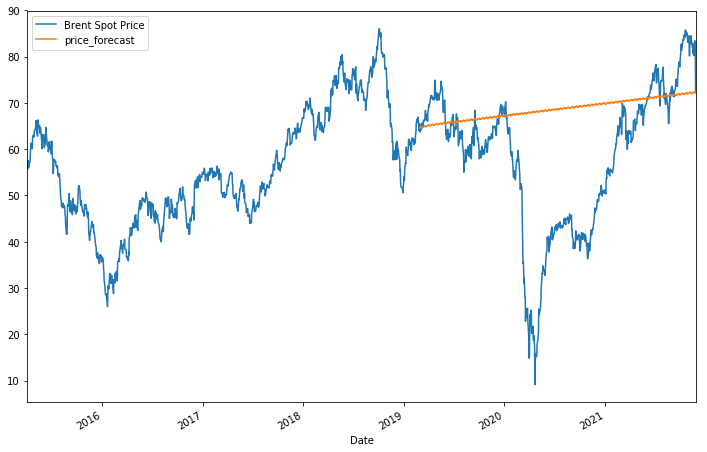

In [62]:
df1['price_forecast'] = model_fit.predict(start= 1000, end=1708, dynamic= True) 
df1[['Brent Spot Price','price_forecast']].plot(figsize=(12,8))

## Decomposing

In [65]:
ts.head()

Date
2015-04-01    55.73
2015-04-02    55.73
2015-04-06    55.73
2015-04-07    57.55
2015-04-08    56.42
Name: Brent Spot Price, dtype: float64

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts_log, period=1)

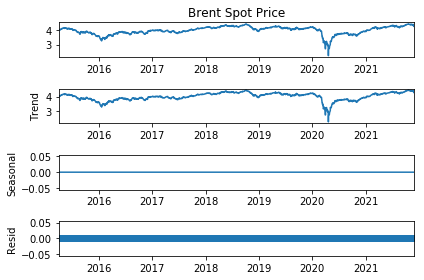

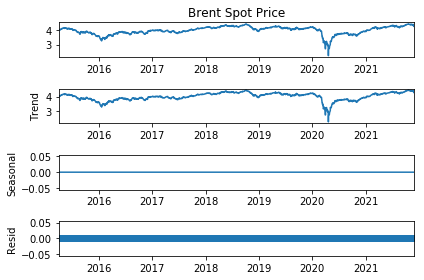

In [67]:
decompose.plot()

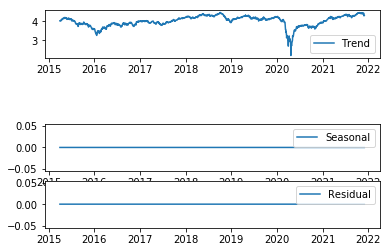

In [68]:
#### lets dcompose one by one

trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

plt.subplot(411)
plt.plot(trend, label="Trend")
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label="Seasonal")
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = "Residual")
plt.legend(loc="best")

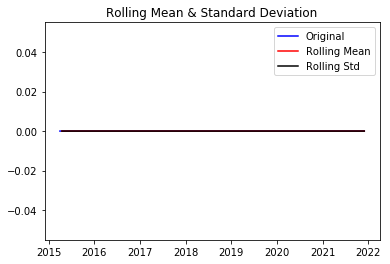

Results of Dickey-Fuller Test:
Test Statistic                         NaN
p-value                                NaN
#Lags Used                        0.000000
Number of Observations Used    1710.000000
Critical Value (1%)              -3.434180
Critical Value (5%)              -2.863232
Critical Value (10%)             -2.567671
dtype: float64


/home/speed/.local/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/speed/.local/lib/python3.5/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [69]:
# check stationarity of residual
residual.sum()

ts_residual = residual
ts_residual.isnull().sum()
test_stationarity(ts_residual)

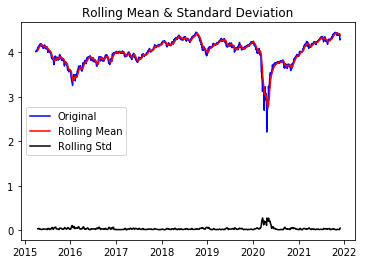

Results of Dickey-Fuller Test:
Test Statistic                   -3.501605
p-value                           0.007946
#Lags Used                       25.000000
Number of Observations Used    1685.000000
Critical Value (1%)              -3.434237
Critical Value (5%)              -2.863257
Critical Value (10%)             -2.567684
dtype: float64


In [70]:
trend.sum()

ts_trend = trend
ts_trend.isnull().sum()
test_stationarity(ts_trend)

In [71]:
# Lets Split data in train and test data
ts.shape

(1711,)

In [72]:
print(ts.head())
print(ts.tail())

Date
2015-04-01    55.73
2015-04-02    55.73
2015-04-06    55.73
2015-04-07    57.55
2015-04-08    56.42
Name: Brent Spot Price, dtype: float64
Date
2021-11-23    83.43
2021-11-24    82.37
2021-11-25    82.05
2021-11-26    72.37
2021-11-29    73.34
Name: Brent Spot Price, dtype: float64


In [73]:
train = ts['2015-04-01':'2020-11-19']
test = ts['2020-11-19':]

In [74]:
train.shape

(1449,)

In [75]:
test.shape

(263,)

In [76]:
len(test)

263

In [77]:
train

Date
2015-04-01    55.73
2015-04-02    55.73
2015-04-06    55.73
2015-04-07    57.55
2015-04-08    56.42
2015-04-09    56.04
2015-04-10    56.82
2015-04-13    57.14
2015-04-14    57.69
2015-04-15    59.32
2015-04-16    60.13
2015-04-17    61.31
2015-04-20    61.20
2015-04-21    60.12
2015-04-22    60.12
2015-04-23    62.66
2015-04-24    62.96
2015-04-27    62.86
2015-04-28    62.61
2015-04-29    63.97
2015-04-30    63.90
2015-05-01    64.13
2015-05-04    64.62
2015-05-05    65.44
2015-05-06    66.22
2015-05-07    64.93
2015-05-08    63.82
2015-05-11    62.82
2015-05-12    65.09
2015-05-13    66.33
              ...  
2020-10-09    41.63
2020-10-12    40.50
2020-10-13    41.34
2020-10-14    41.81
2020-10-15    41.61
2020-10-16    41.34
2020-10-19    41.29
2020-10-20    41.62
2020-10-21    40.09
2020-10-22    41.28
2020-10-23    40.71
2020-10-26    39.06
2020-10-27    39.72
2020-10-28    37.86
2020-10-29    36.56
2020-10-30    36.33
2020-11-02    37.78
2020-11-03    38.17
2020-11-04    3

Test Statistic                   -1.739812
p-value                           0.410726
#Lags Used                        0.000000
Number of Observations Used    1448.000000
Critical Value (1%)              -3.434874
Critical Value (5%)              -2.863538
Critical Value (10%)             -2.567834
dtype: float64


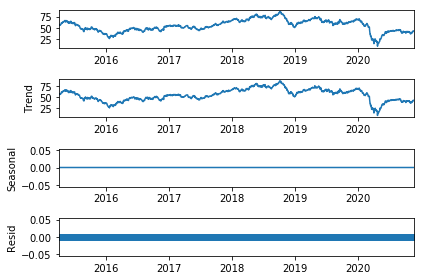

In [78]:
# Lets build the model 

# Holts Linear Model

import statsmodels.api as sm
df_train = pd.DataFrame(train)
decomp = sm.tsa.seasonal_decompose(df_train, period=1)
decomp.plot()

result = sm.tsa.stattools.adfuller(df_train)


dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

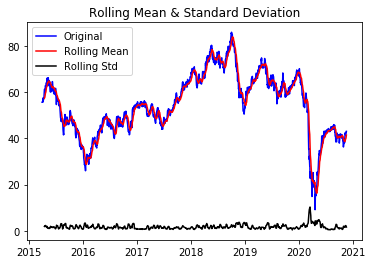

Results of Dickey-Fuller Test:
Test Statistic                   -1.739812
p-value                           0.410726
#Lags Used                        0.000000
Number of Observations Used    1448.000000
Critical Value (1%)              -3.434874
Critical Value (5%)              -2.863538
Critical Value (10%)             -2.567834
dtype: float64


In [79]:
test_stationarity(train)

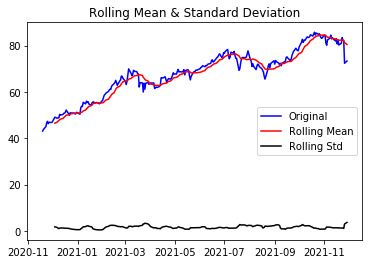

Results of Dickey-Fuller Test:
Test Statistic                  -2.113447
p-value                          0.239142
#Lags Used                       7.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64


In [80]:
test_stationarity(test)

/home/speed/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/speed/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


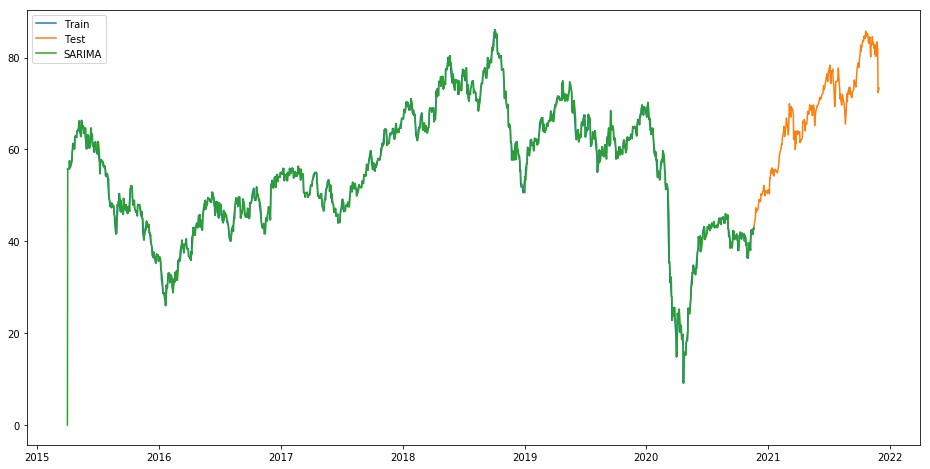

In [81]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train).fit()
y_hat_avg['SARIMA'] = fit1.predict()
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()


In [82]:
from statsmodels.tsa.arima_model import ARIMA

/home/speed/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/speed/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


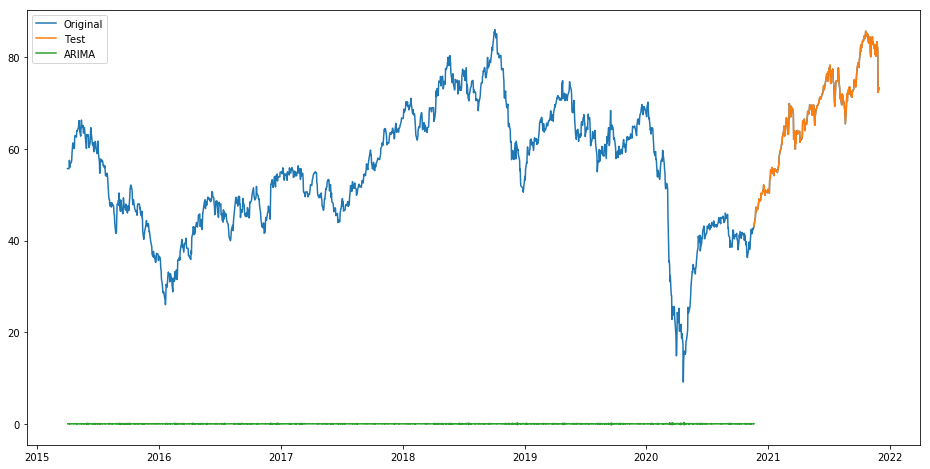

In [83]:
y_hat_avg = test.copy()
fit1 = ARIMA(train,order=(1,1,2)).fit()
y_hat_avg['ARIMA'] = fit1.predict()
plt.figure(figsize=(16,8))
plt.plot( ts, label='Original')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['ARIMA'],label='ARIMA')
plt.legend(loc='best')
plt.show()


In [84]:
train.index

DatetimeIndex(['2015-04-01', '2015-04-02', '2015-04-06', '2015-04-07',
               '2015-04-08', '2015-04-09', '2015-04-10', '2015-04-13',
               '2015-04-14', '2015-04-15',
               ...
               '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19'],
              dtype='datetime64[ns]', name='Date', length=1449, freq=None)

In [85]:
test1 = pd.DataFrame()
test1['date'] = pd.date_range(start='2021-12-01', end='2022-01-31')

In [86]:
len(ts['2020-12'])

22

In [87]:
test1.index = test1['date']

In [88]:
forecast = test1.drop('date', axis = 1)

In [89]:
forecast.index = pd.to_datetime(forecast.index)

In [90]:
forecast.index

DatetimeIndex(['2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12',
               '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-01',
               '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17',
               '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
      

In [91]:
len(forecast.index)

62

In [92]:
forecast.index[61]

Timestamp('2022-01-31 00:00:00')